In [2]:
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt

# Configuration options
testbeds = ["2xL", "2xR", "1L1R"]
security_levels = [80, 112, 128]
mt_algos = ["OT", "Paillier", "DGK"]
bit_lengths = ["64bit", "32bit"]
networks = ["Wireless", "Wired"]

# Generate all permutations
permutations = list(product(testbeds, security_levels, mt_algos, bit_lengths, networks))

# Create empty sets with descriptive names for each permutation
sets = {}

for perm in permutations:
    # Generate a descriptive name based on the permutation
    name = f"{perm[0]}_{perm[1]}_{perm[2]}_{perm[3]}_{perm[4]}"
    
    # Create an empty set and df with the generated name
    sets[f"{name}"] = set()

In [2]:
# list dfs that have more than n rows
!cd ../dfs/ && find . -type f | sort | xargs wc -l | awk '$1 > 16'

     23 ./2023-08-11_16-11-25.csv
     17 ./2023-08-11_17-50-24.csv
     17 ./2023-08-11_18-08-52.csv
     17 ./2023-08-11_18-27-31.csv
     17 ./2023-08-11_18-46-04.csv
     17 ./2023-08-11_19-05-19.csv
     17 ./2023-08-11_19-25-15.csv
     17 ./2023-08-11_19-44-36.csv
     17 ./2023-08-12_00-45-56.csv
     17 ./2023-08-12_01-14-04.csv
     17 ./2023-08-12_01-41-54.csv
     17 ./2023-08-12_08-58-20.csv
     17 ./2023-08-12_09-56-48.csv
     17 ./2023-08-12_10-27-23.csv
     17 ./2023-08-12_11-00-42.csv
     17 ./2023-08-12_11-40-56.csv
     17 ./2023-08-12_12-58-09.csv
     17 ./2023-08-12_14-00-23.csv
     17 ./2023-08-12_16-45-07.csv
     90 ./2023-08-12_18-46-07.csv
     75 ./2023-08-13_10-51-25.csv
    569 ./2023-08-13_17-00-40.csv
    105 ./2023-08-14_16-43-25.csv
     17 ./2023-08-18_11-50-48.csv
    199 ./2023-08-18_14-58-28.csv
     17 ./2023-08-18_20-03-07.csv
     73 ./2023-08-19_10-43-49.csv
   1719 ./2023-08-20_22-02-32.csv
     47 ./2023-08-22_19-36-38.csv
    739 ./2023

2023-09-14 16:50:46,973 - DEBUG - pffrocd config: {
    "client": {
        "ip_address": "192.168.5.121",
        "username": "kamil",
        "private_ssh_key_path": "/home/dietpi/.ssh/id_rsa",
        "executable_path": "/home/kamil/pffrocd/ABY/build/bin",
        "executable_name": "cos_dist_float_scen_simd",
        "pffrocd_path": "/home/kamil/pffrocd"
    },
    "server": {
        "ip_address": "192.168.5.122",
        "username": "kamil",
        "private_ssh_key_path": "/home/dietpi/.ssh/id_rsa",
        "executable_path": "/home/kamil/pffrocd/ABY/build/bin",
        "executable_name": "cos_dist_float_scen_simd",
        "pffrocd_path": "/home/kamil/pffrocd"
    },
    "misc": {
        "nr_of_people": "1500",
        "security_level": "128",
        "mt_algorithm": "0",
        "niceness": "-20",
        "starting_person": "20",
        "bit_length": "64"
    }

SFE TIME STATISTICS
count    265.000000
mean      14.989093
std        0.152283
min       14.693118
25%       14.8

<Axes: >

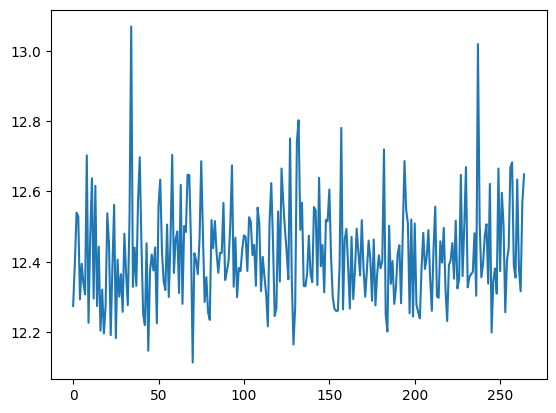

In [3]:
# inspect configuration of a given dfs
NAME = '2023-09-14_16-50-46'

with open(f"../log/debug_{NAME}.log") as input_file:
    head = [next(input_file) for _ in range(25)]
print(''.join(head))

df_inspecting = pd.read_csv(f"../dfs/{NAME}.csv")
print("SFE TIME STATISTICS")
print(df_inspecting['sfe_time'].describe())
(df_inspecting['timings.total'] / 1000).plot()

In [4]:
# add good data to appropriate sets

sets['2xL_112_OT_64bit_Wired'].add('2023-08-20_22-02-32')
sets['2xL_112_OT_32bit_Wireless'].add('2023-09-05_02-58-18')
sets['2xL_112_OT_64bit_Wireless'].add('2023-08-23_14-14-16')
sets['2xL_112_OT_32bit_Wireless'].add('2023-09-03_15-21-22')
sets['2xL_80_OT_32bit_Wired'].add('2023-09-10_16-59-26')
sets['2xL_80_OT_32bit_Wireless'].add('2023-09-10_23-40-22')

sets['2xR_80_OT_64bit_Wired'].add('2023-08-11_17-50-24')
sets['2xR_80_Paillier_64bit_Wired'].add('2023-08-11_18-08-52')
sets['2xR_80_DGK_64bit_Wired'].add('2023-08-11_18-27-31')
sets['2xR_112_OT_64bit_Wired'].add('2023-08-11_18-46-04')
sets['2xR_112_Paillier_64bit_Wired'].add('2023-08-11_19-05-19')
sets['2xR_112_DGK_64bit_Wired'].add('2023-08-11_19-25-15')
sets['2xR_128_OT_64bit_Wired'].add('2023-08-11_19-44-36')
sets['2xR_128_Paillier_64bit_Wired'].add('2023-08-12_15-22-06')
sets['2xR_128_DGK_64bit_Wired'].add('2023-08-12_16-45-07')

sets['2xR_80_OT_64bit_Wireless'].add('2023-08-12_00-45-56')
sets['2xR_80_Paillier_64bit_Wireless'].add('2023-08-12_01-14-04')
sets['2xR_80_DGK_64bit_Wireless'].add('2023-08-12_01-41-54')
sets['2xR_112_OT_64bit_Wireless'].add('2023-08-12_12-58-09')
sets['2xR_112_Paillier_64bit_Wireless'].add('2023-08-12_14-00-23')
sets['2xR_112_DGK_64bit_Wireless'].add('2023-08-12_09-56-48')
sets['2xR_128_OT_64bit_Wireless'].add('2023-08-12_10-27-23')
sets['2xR_128_Paillier_64bit_Wireless'].add('2023-08-12_11-00-42')
sets['2xR_128_DGK_64bit_Wireless'].add('2023-08-12_11-40-56')

sets['2xL_80_OT_32bit_Wired'].add('2023-09-09_17-33-46')
# sets['2xL_80_OT_32bit_Wireless'].add('2023-09-11_10-47-32')
# sets['2xL_80_OT_32bit_Wireless'].add('2023-09-11_12-19-37')

# sets['2xL_80_OT_32bit_Wireless'].add('2023-09-11_13-35-42')
# sets['2xL_80_OT_32bit_Wireless'].add('2023-09-11_17-57-05')

# sets['2xL_80_OT_32bit_Wireless'].add('2023-09-11_21-29-22')
sets['2xL_112_OT_32bit_Wireless'].add('2023-09-11_23-41-02')
sets['2xL_112_OT_32bit_Wireless'].add('2023-09-12_17-41-33')
sets['2xL_128_OT_32bit_Wireless'].add('2023-09-12_22-10-17')
sets['2xL_128_OT_32bit_Wireless'].add('2023-09-13_07-35-49')

sets['2xL_80_OT_64bit_Wireless'].add('2023-09-13_19-06-51')
sets['2xR_80_OT_32bit_Wired'].add('2023-09-14_09-32-11')

sets['2xR_80_OT_32bit_Wireless'].add('2023-09-15_13-10-22')

sets['2xR_112_OT_32bit_Wireless'].add('2023-09-15_18-58-12')
sets['2xR_112_OT_32bit_Wireless'].add('2023-09-15_22-32-01')
sets['2xR_128_OT_32bit_Wireless'].add('2023-09-16_09-46-47')
sets['2xR_128_OT_32bit_Wireless'].add('2023-09-17_13-02-25')


In [5]:
# create dfs from the gathered csvs

dfs = {}
for k in sets.keys():
    if not sets[k]:
        continue
    dfs[k] = pd.concat((pd.read_csv(f"../dfs/{f}.csv") for f in sets[k]), ignore_index=True)

In [6]:
# print how many tests for each config
tot = 0
for k in dfs:
    print(f"{k}: {len(dfs[k])}")
    tot+=len(dfs[k])
print(f"total: {tot}")

2xL_80_OT_64bit_Wireless: 346
2xL_80_OT_32bit_Wireless: 521
2xL_80_OT_32bit_Wired: 526
2xL_112_OT_64bit_Wireless: 738
2xL_112_OT_64bit_Wired: 1718
2xL_112_OT_32bit_Wireless: 1179
2xL_128_OT_32bit_Wireless: 473
2xR_80_OT_64bit_Wireless: 16
2xR_80_OT_64bit_Wired: 16
2xR_80_OT_32bit_Wireless: 26
2xR_80_OT_32bit_Wired: 25
2xR_80_Paillier_64bit_Wireless: 16
2xR_80_Paillier_64bit_Wired: 16
2xR_80_DGK_64bit_Wireless: 16
2xR_80_DGK_64bit_Wired: 16
2xR_112_OT_64bit_Wireless: 16
2xR_112_OT_64bit_Wired: 16
2xR_112_OT_32bit_Wireless: 292
2xR_112_Paillier_64bit_Wireless: 16
2xR_112_Paillier_64bit_Wired: 16
2xR_112_DGK_64bit_Wireless: 16
2xR_112_DGK_64bit_Wired: 16
2xR_128_OT_64bit_Wireless: 16
2xR_128_OT_64bit_Wired: 16
2xR_128_OT_32bit_Wireless: 739
2xR_128_Paillier_64bit_Wireless: 16
2xR_128_Paillier_64bit_Wired: 6
2xR_128_DGK_64bit_Wireless: 16
2xR_128_DGK_64bit_Wired: 16
total: 6861


In [7]:
# save the dataframes

for k in dfs:
    dfs[k].to_csv(f"{k}.csv")

<hr style="border:2px solid black">
manual data inspection Result 1

In [8]:
df_inspecting = {}
data_name = '2xL_112_OT_32bit_Wireless'
for k in sets[data_name]:
    print(k)
    df_inspecting[k] = pd.read_csv(f"../dfs/{k}.csv")

2023-09-03_15-21-22
2023-09-11_23-41-02
2023-09-12_17-41-33
2023-09-05_02-58-18


In [9]:
for k in sets[data_name]:
    print(k)
    print((df_inspecting[k]['timings.total'] / 1000).describe())

2023-09-03_15-21-22
count    44.000000
mean     61.074229
std       2.629553
min      56.115851
25%      58.479600
50%      61.615925
75%      62.858000
max      65.961986
Name: timings.total, dtype: float64
2023-09-11_23-41-02
count      915.000000
mean        79.627155
std        898.109095
min         44.490788
25%         47.837498
50%         48.794820
75%         49.996184
max      27211.913000
Name: timings.total, dtype: float64
2023-09-12_17-41-33
count    178.000000
mean      71.101754
std       13.208212
min       48.635858
25%       66.041765
50%       70.367178
75%       78.874280
max      154.866562
Name: timings.total, dtype: float64
2023-09-05_02-58-18
count    42.000000
mean     57.851605
std       2.934656
min      52.521715
25%      55.736841
50%      57.570673
75%      59.469276
max      65.260356
Name: timings.total, dtype: float64


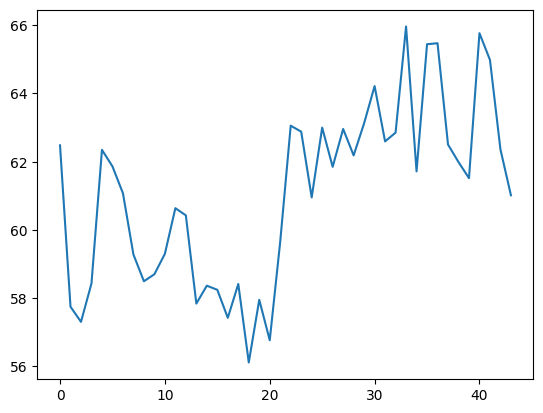

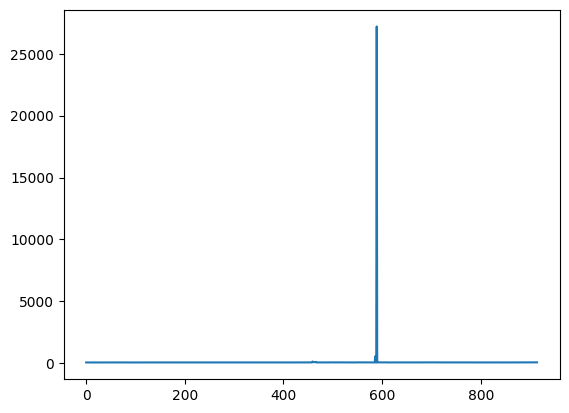

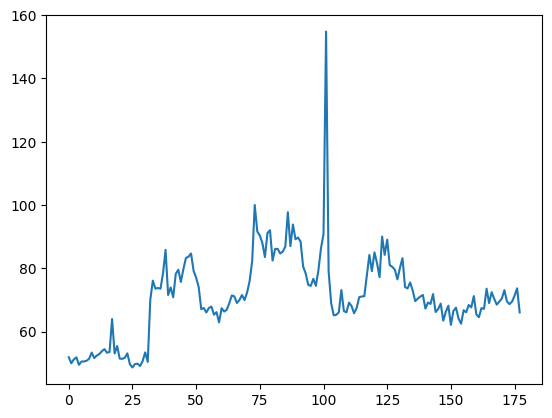

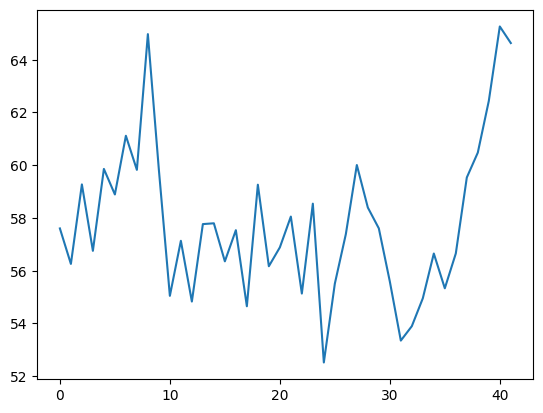

In [10]:
for k in sets[data_name]:
    plt.plot(df_inspecting[k]['timings.total'] / 1000)
    plt.show()

In [14]:
dfs['2xR_128_OT_32bit_Wireless'][['timings.total', 'timings.online', 'timings.baseots', 'timings.network', 'timings.otextension']].describe()

,timings.total,timings.online,timings.baseots,timings.network,timings.otextension
count,739.000000,739.000000,739.000000,739.000000,739.000000
mean,41088.366647,31670.819047,3859.377233,83.116207,9380.417073
std,4385.893095,3434.377411,1033.369575,93.227860,1005.580080
min,31623.504000,24062.302000,1905.224000,10.995000,7475.118000
25%,35547.688000,27530.700500,2247.616500,19.776500,8201.790500
50%,43410.533000,33505.422000,4497.991000,27.858000,9717.660000
75%,43875.604000,33776.221000,4519.595500,126.899500,10052.450000
max,51735.270000,38280.086000,4573.824000,437.688000,14487.455000


In [15]:
dfs['2xR_128_OT_32bit_Wireless'][['communication.total.sent', 'communication.online.sent', 'communication.base_ots.sent', 'communication.otextension.sent']].describe()

,communication.total.sent,communication.online.sent,communication.base_ots.sent,communication.otextension.sent
count,7.390000e+02,739.0,739.000000,7.390000e+02
mean,3.164899e+07,549717.0,49953.101488,3.109927e+07
std,4.208230e+00,0.0,4.208230,3.605004e+00
min,3.164899e+07,549717.0,49947.000000,3.109926e+07
25%,3.164899e+07,549717.0,49947.000000,3.109927e+07
50%,3.164899e+07,549717.0,49956.000000,3.109927e+07
75%,3.164900e+07,549717.0,49956.000000,3.109927e+07
max,3.164900e+07,549717.0,49956.000000,3.109927e+07
